In [40]:
from pandas.errors import EmptyDataError
import pandas as pd
import os 
import glob 

csv_files = glob.glob(os.path.join("../msc_similarity/exp1_ms_with_random_dataset/results_rank/", "*.csv")) 
  
dfs = []
for f in csv_files:       
    try:
        df = pd.read_csv(f)
        if len(df) > 0:
            df['layer'] = df['name'].index + 1 
            dfs.append(df)
    except EmptyDataError:
        continue
        
df = pd.concat(dfs, ignore_index=True)

In [33]:
#matchpatt = "X5bw"
print(df['model'].unique())
#print(df[ df['model'].str.contains(matchpatt) ]['model'].unique())
#print(df[ df['model'].str.contains(matchpatt) ]['dataset'])
#print(df[ df['model'].str.contains(matchpatt) ])
#print(df)

['X7unbias' 'X7bw' 'bw' 'X5bgonly' 'X5bias' 'X8bgonly' 'X8bg' 'X8mix'
 'X6bg' 'X6mix' 'X4unbias' 'X3mix' 'X6bgonly' 'X4bias' 'X4mix' 'X6bw'
 'X7bias' 'X5mix' 'X4bg' 'X3unbias' 'X5unbias' 'X6unbias' 'X7bgonly'
 'X3bgonly' 'X7bg' 'X5bg' 'X4bgonly' 'X3bw' 'X6bias' 'X8bw' 'unbias'
 'X3bg' 'X8bias' 'X5bw' 'X3bias' 'mix' 'bias' 'X8unbias' 'X4bw' 'bgonly'
 'X7mix']


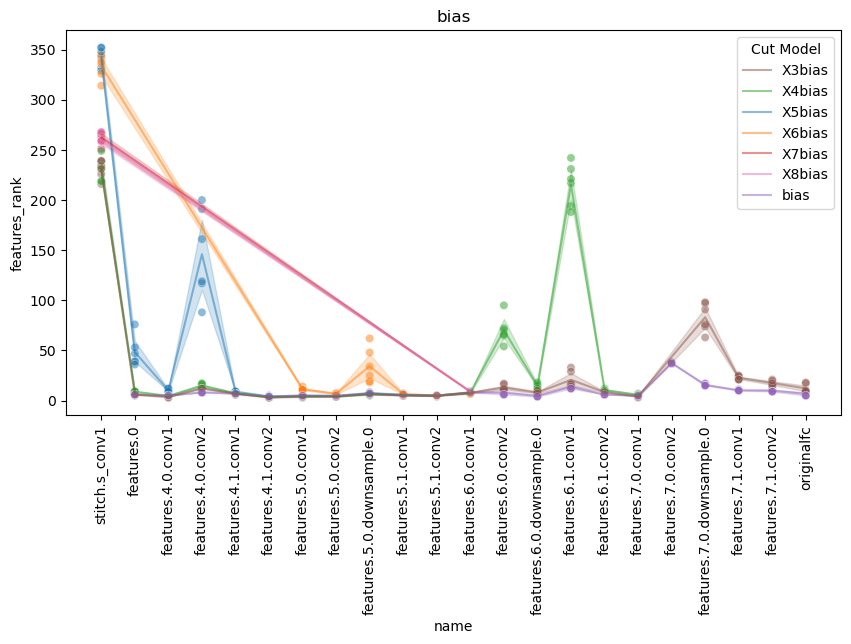

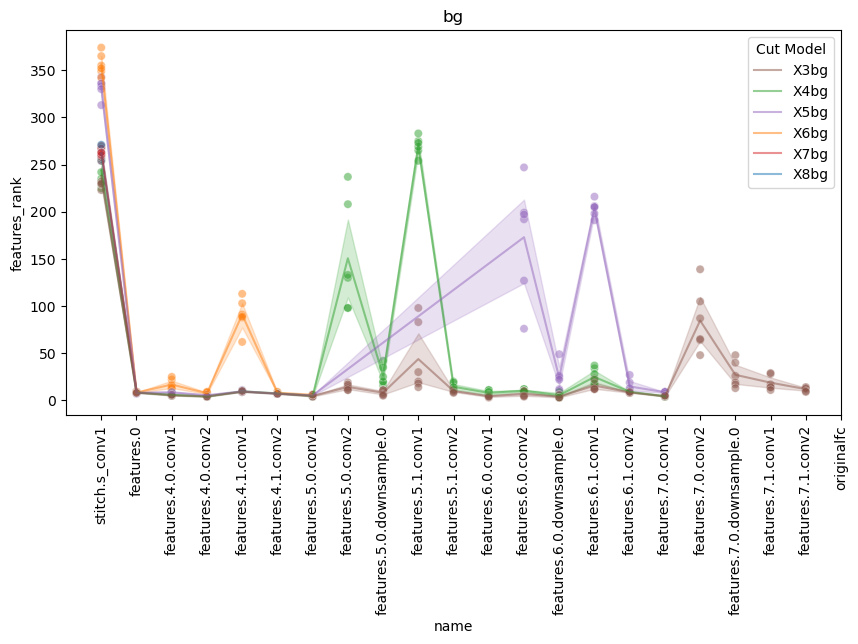

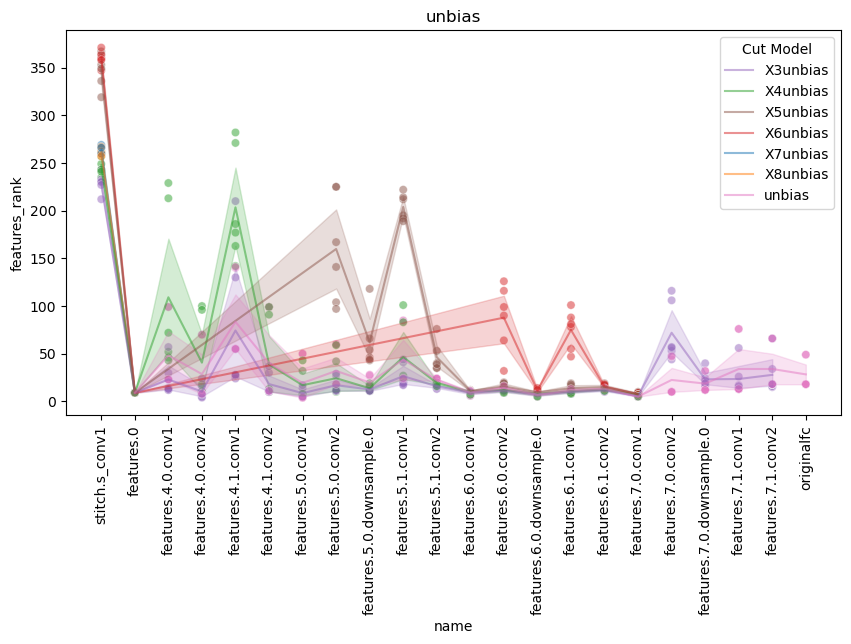

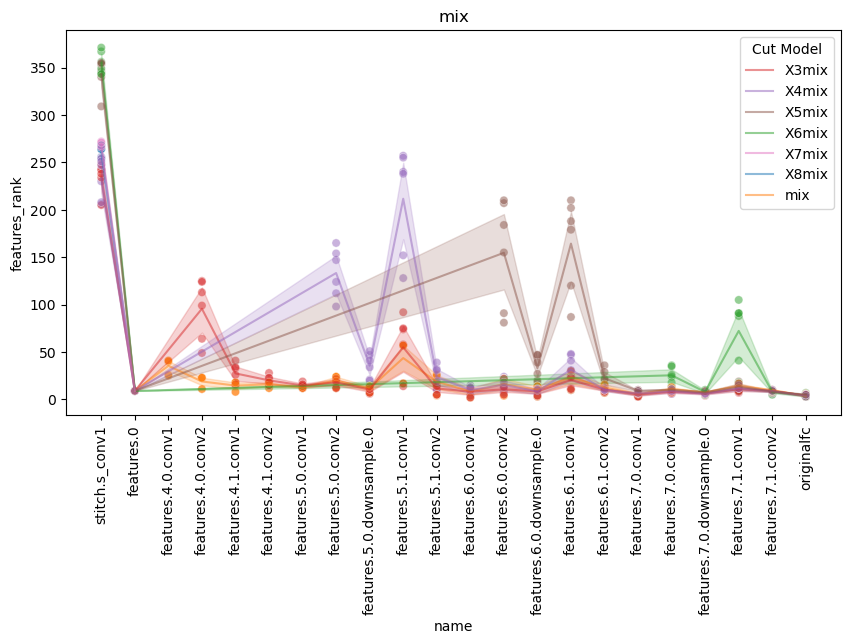

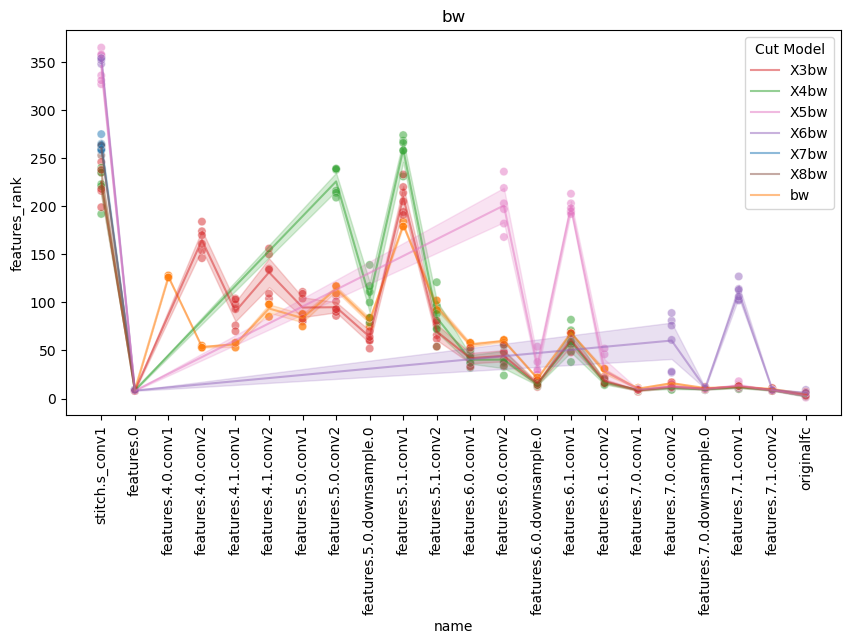

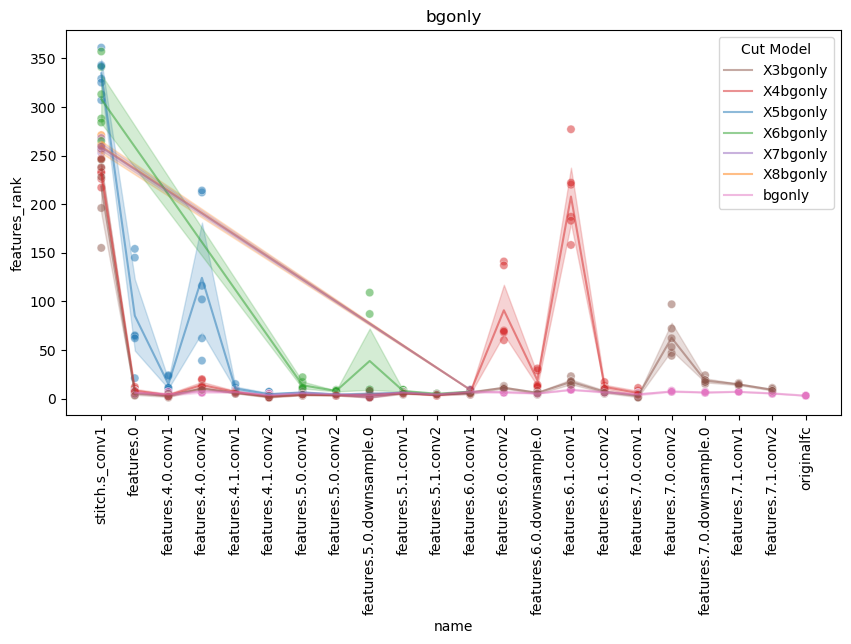

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# , 'mlp6', 'mlp8', 'mlp10', 'mlp12'
#order = ['conv1', 'layer1.0.conv1', 'layer1.0.conv2', 'layer1.1.conv1', 'layer1.1.conv2', 'layer2.0.conv1', 'layer2.0.conv2', 'layer2.0.downsample.0', 'layer2.1.conv1', 'layer2.1.conv2', 'layer3.0.conv1', 'layer3.0.conv2', 'layer3.0.downsample.0', 'layer3.1.conv1', 'layer3.1.conv2', 'layer4.0.conv1', 'layer4.0.conv2', 'layer4.0.downsample.0', 'layer4.1.conv1', 'layer4.1.conv2', 'fc']

order = ['stitch.s_conv1', 'features.0', 'features.4.0.conv1', 'features.4.0.conv2', 'features.4.1.conv1', 'features.4.1.conv2', 'features.5.0.conv1', 'features.5.0.conv2', 'features.5.0.downsample.0', 'features.5.1.conv1', 'features.5.1.conv2', 'features.6.0.conv1', 'features.6.0.conv2', 'features.6.0.downsample.0', 'features.6.1.conv1', 'features.6.1.conv2', 'features.7.0.conv1', 'features.7.0.conv2', 'features.7.0.downsample.0', 'features.7.1.conv1', 'features.7.1.conv2', 'originalfc']

graphs = {'bias': '(?<!un)bias', 'bg': 'bg$', 'unbias': 'unbias','mix': 'mix','bw': 'bw','bgonly': 'bgonly'}
for k, v in graphs.items(): # ['(?<!un)bias', 'bg$', 'unbias', 'mix', 'bw', 'bgonly']:
    # df2 = df[(df['model']==model) & (df['lr']==0.01) & (df['dataset']=='cifar10')]
    matchpattern = v
    df2 = df[(df['model'].str.contains(matchpattern)) ] 
    #print(df2)
    #plt.figure(figsize = (10,5))
    #plt.title(model)
    #sns.lineplot(x="epoch", y="val_acc", hue="model", data=df2)

    plt.figure(figsize = (10,5))
    plt.title(k)
    #sns.scatterplot(x="layer", y="features_rank", hue='epoch', data=df2)
    sns.scatterplot(x="name", y="features_rank", hue="model", data=df2, alpha=0.5, legend=False)
    line_plot = sns.lineplot(x="name", y="features_rank", hue="model", data=df2, alpha=0.5)
    plt.xticks(np.arange(len(order)), order)
    plt.xticks(rotation=90)
    handles, labels = line_plot.get_legend_handles_labels()
    sorted_labels_handles = sorted(zip(labels, handles))
    labels, handles = zip(*sorted_labels_handles)
    plt.legend(handles, labels, title='Cut Model', loc='upper right')
    plt.savefig(f"./results/{k}_rank.png")


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# , 'mlp6', 'mlp8', 'mlp10', 'mlp12'
matchpatt = "bw"
for model in df[ df['model'].str.contains(matchpatt) ]['model'].unique():  # ['resnet18', 'resnet34', 'vgg19', 'vgg19_bn']:
    # df2 = df[(df['model']==model) & (df['lr']==0.01) & (df['dataset']=='cifar10')]
    df2 = df[(df['model']==model) ]
    #plt.figure(figsize = (10,5))
    #plt.title(model)
    #sns.lineplot(x="epoch", y="val_acc", hue="model", data=df2)
    
    plt.figure(figsize = (10,5))
    plt.title(model)
    #sns.scatterplot(x="layer", y="features_rank", hue='epoch', data=df2)
    sns.scatterplot(x="name", y="features_rank", data=df2)
    plt.xticks(rotation=90)
    #plt.show()


In [43]:
df2[df2['name']=='features.6.1.conv1']

,Unnamed: 0,name,model,dataset,seed,val_acc,features_rank,features_dim,normalized_features_rank,layer
29,4,features.6.1.conv1,X5bgonly,synth,47,1.0000,9,1024,0.008789,5
97,4,features.6.1.conv1,X5bgonly,synth,49,1.0000,11,1024,0.010742,5
553,9,features.6.1.conv1,X4bgonly,synth,49,1.0000,8,1024,0.007812,10
606,4,features.6.1.conv1,X5bgonly,synth,48,1.0000,9,1024,0.008789,5
678,13,features.6.1.conv1,X3bgonly,synth,48,0.9998,6,1024,0.005859,14
697,9,features.6.1.conv1,X4bgonly,synth,50,1.0000,9,1024,0.008789,10
783,9,features.6.1.conv1,X4bgonly,synth,45,1.0000,6,1024,0.005859,10
829,13,features.6.1.conv1,X3bgonly,synth,50,1.0000,6,1024,0.005859,14
923,4,features.6.1.conv1,X5bgonly,synth,50,1.0000,15,1024,0.014648,5
991,4,features.6.1.conv1,X5bgonly,synth,46,1.0000,9,1024,0.008789,5


In [44]:
df[df['name']=='features.6.1.conv1']

,Unnamed: 0,name,model,dataset,seed,val_acc,features_rank,features_dim,normalized_features_rank,layer
17,13,features.6.1.conv1,bw,bw,48,0.9906,31,1024,0.030273,14
29,4,features.6.1.conv1,X5bgonly,synth,47,1.0000,9,1024,0.008789,5
41,4,features.6.1.conv1,X5bias,synth,45,1.0000,9,1024,0.008789,5
62,9,features.6.1.conv1,X4bw,synth,50,1.0000,15,1024,0.014648,10
83,13,features.6.1.conv1,X3bw,synth,49,0.9999,17,1024,0.016602,14
...,...,...,...,...,...,...,...,...,...,...
2727,13,features.6.1.conv1,X3bgonly,synth,46,1.0000,5,1024,0.004883,14
2757,13,features.6.1.conv1,X3bg,synth,45,1.0000,9,1024,0.008789,14
2769,4,features.6.1.conv1,X5mix,synth,45,1.0000,29,1024,0.028320,5
2790,13,features.6.1.conv1,bias,bias,45,1.0000,7,1024,0.006836,14


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# , 'mlp6', 'mlp8', 'mlp10', 'mlp12'
for model in ['resnet18', 'resnet34', 'vgg19', 'vgg19_bn']:
    df2 = df[(df['model']==model) & (df['lr']==0.01) & (df['dataset']=='cifar10')]
    
    plt.figure(figsize = (10,5))
    plt.title(model)
    sns.scatterplot(x="layer", y="normalized_features_rank", hue='epoch', data=df2)
